In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
%matplotlib inline

In [2]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
transaction = []
with open("transactions_retail1.csv") as f:
    transaction = f.read()



In [4]:
# splitting the data into separate transactions using separator as "\n"
transaction = transaction.split("\n")

In [5]:
transaction

["'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA",
 "'LANTERN','METAL','WHITE',NA,NA,NA",
 "'COAT','CREAM','CUPID','HANGER','HEARTS',NA",
 "'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'",
 "'HEART.','HOTTIE','RED','WHITE','WOOLLY',NA",
 "'7','BABUSHKA','BOXES','NESTING','SET',NA",
 "'FROSTED','GLASS','HOLDER','STAR','T-LIGHT',NA",
 "'HAND','JACK','UNION','WARMER',NA,NA",
 "'DOT','HAND','POLKA','RED','WARMER',NA",
 "'ASSORTED','BIRD','COLOUR','ORNAMENT',NA,NA",
 "'BEDROOM','PLAYHOUSE','POPPY''S',NA,NA,NA",
 "'KITCHEN','PLAYHOUSE','POPPY''S',NA,NA,NA",
 "'CHARLOTTE','DOLL','FELTCRAFT','PRINCESS',NA,NA",
 "'COSY','IVORY','KNITTED','MUG',NA,NA",
 "'6','ASSORTED','BOX','COLOUR','OF','TEASPOONS'",
 "'BLOCKS','BOX','JIGSAW','OF','VINTAGE',NA",
 "'ALPHABET','BLOCKS','BOX','OF','VINTAGE',NA",
 "'BLOCK','BUILDING','HOME','WORD',NA,NA",
 "'BLOCK','BUILDING','LOVE','WORD',NA,NA",
 "'BOX','HEART','METAL','RECIPE','WITH',NA",
 "'DOORMAT','ENGLAND','NEW',NA,NA,NA",
 "'JAM','JARS','MAKING','SET','W

In [6]:
transaction_list = []
for i in transaction:
    transaction_list.append(i.split(","))

In [7]:
transaction_list

[["'HANGING'", "'HEART'", "'HOLDER'", "'T-LIGHT'", "'WHITE'", 'NA'],
 ["'LANTERN'", "'METAL'", "'WHITE'", 'NA', 'NA', 'NA'],
 ["'COAT'", "'CREAM'", "'CUPID'", "'HANGER'", "'HEARTS'", 'NA'],
 ["'BOTTLE'", "'FLAG'", "'HOT'", "'KNITTED'", "'UNION'", "'WATER'"],
 ["'HEART.'", "'HOTTIE'", "'RED'", "'WHITE'", "'WOOLLY'", 'NA'],
 ["'7'", "'BABUSHKA'", "'BOXES'", "'NESTING'", "'SET'", 'NA'],
 ["'FROSTED'", "'GLASS'", "'HOLDER'", "'STAR'", "'T-LIGHT'", 'NA'],
 ["'HAND'", "'JACK'", "'UNION'", "'WARMER'", 'NA', 'NA'],
 ["'DOT'", "'HAND'", "'POLKA'", "'RED'", "'WARMER'", 'NA'],
 ["'ASSORTED'", "'BIRD'", "'COLOUR'", "'ORNAMENT'", 'NA', 'NA'],
 ["'BEDROOM'", "'PLAYHOUSE'", "'POPPY''S'", 'NA', 'NA', 'NA'],
 ["'KITCHEN'", "'PLAYHOUSE'", "'POPPY''S'", 'NA', 'NA', 'NA'],
 ["'CHARLOTTE'", "'DOLL'", "'FELTCRAFT'", "'PRINCESS'", 'NA', 'NA'],
 ["'COSY'", "'IVORY'", "'KNITTED'", "'MUG'", 'NA', 'NA'],
 ["'6'", "'ASSORTED'", "'BOX'", "'COLOUR'", "'OF'", "'TEASPOONS'"],
 ["'BLOCKS'", "'BOX'", "'JIGSAW'", "'OF'"

In [8]:
all_transaction_list = [i for item in transaction_list for i in item]

In [10]:
from collections import Counter # ,OrderedDict
item_frequencies = Counter(all_transaction_list)

In [11]:
# after sorting
item_frequencies = sorted(item_frequencies.items(), key = lambda x:x[1])

In [12]:
# Storing frequencies and items in separate variables 
frequencies = list(reversed([i[1] for i in item_frequencies]))
items = list(reversed([i[0] for i in item_frequencies]))

In [13]:
# barplot of top 10 
import matplotlib.pyplot as plt

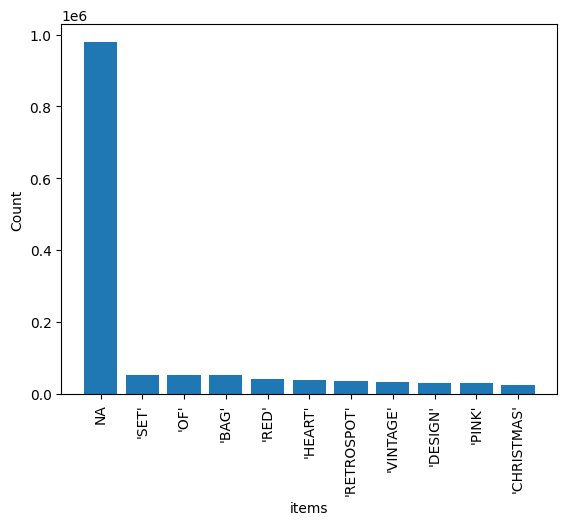

In [14]:
plt.bar(height = frequencies[0:11], x = list(range(0, 11)))
plt.xticks(list(range(0, 11), ), items[0:11], rotation = 90)
plt.xlabel("items")
plt.ylabel("Count")
plt.show()

In [15]:
# Creating Data Frame for the transactions data
transaction_series = pd.DataFrame(pd.Series(transaction_list))
transaction_series = transaction_series.iloc[:9835, :] # removing the last empty transaction

In [17]:
transaction_series.columns = ["transactions"]
transaction_series

,transactions
0,"['HANGING', 'HEART', 'HOLDER', 'T-LIGHT', 'WHI..."
1,"['LANTERN', 'METAL', 'WHITE', NA, NA, NA]"
2,"['COAT', 'CREAM', 'CUPID', 'HANGER', 'HEARTS',..."
3,"['BOTTLE', 'FLAG', 'HOT', 'KNITTED', 'UNION', ..."
4,"['HEART.', 'HOTTIE', 'RED', 'WHITE', 'WOOLLY',..."
...,...
9830,"['BOWL', 'JAM', 'RED', 'RETROSPOT', 'SUGAR', NA]"
9831,"['BUTTER', 'DISH', 'RED', 'RETROSPOT', NA, NA]"
9832,"['BAG', 'LUNCH', 'RED', 'RETROSPOT', NA, NA]"
9833,"['BAG', 'DESIGN', 'LUNCH', 'SUKI', NA, NA]"


In [19]:
# creating a dummy columns for the each item in each transactions ... Using column names as item name
X = transaction_series['transactions'].str.join(sep = '*').str.get_dummies(sep = '*')
X

,"""'","""'25W","""'A","""'BOX","""'BUTTERFLIES","""'CAKESTAND","""'CARD","""'DECOUPAGE","""'ELEPHANT","""'FAIRY",...,"GREETING'""","HOT'""","LIGHT'""","MAGIC'""","METAL'""",NA,"PINK'""","SUGAR'""","TREES'""","pack/12'"""
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
frequent_itemsets = apriori(X, min_support = 0.0075, max_len = 4, use_colnames = True)

In [22]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support', ascending = False, inplace = True)
frequent_itemsets

,support,itemsets
124,0.872801,(NA)
88,0.093238,('RED')
261,0.080122,"('RED', NA)"
94,0.075953,('SET')
31,0.073310,('CHRISTMAS')
...,...,...
95,0.007524,('SEWING')
50,0.007524,('GIFT')
191,0.007524,"('DOLL', NA)"
198,0.007524,"('WHITE', 'FINISH')"


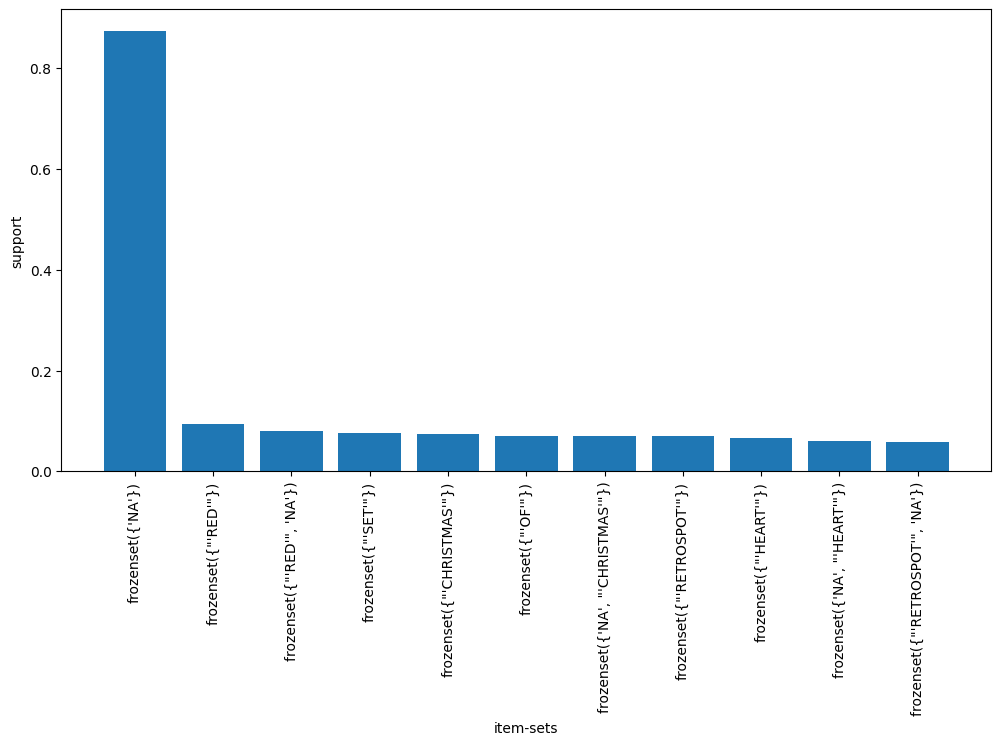

In [25]:
plt.figure(figsize =(12,6))
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=90)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [26]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head(20)
rules.sort_values('lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
753,('POPPY''S'),('PLAYHOUSE'),0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
744,"('PLAYHOUSE', NA)",('POPPY''S'),0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
749,('POPPY''S'),"('PLAYHOUSE', NA)",0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
747,('PLAYHOUSE'),"(NA, 'POPPY''S')",0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
746,"(NA, 'POPPY''S')",('PLAYHOUSE'),0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
752,('PLAYHOUSE'),('POPPY''S'),0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
775,"('PACK', '12', 'OF')",('TISSUES'),0.009049,0.007829,0.007829,0.865169,110.505618,0.007758,7.35860
778,"('PACK', '12')","('TISSUES', 'OF')",0.009049,0.007829,0.007829,0.865169,110.505618,0.007758,7.35860
757,"('PACK', '12')",('TISSUES'),0.009049,0.007829,0.007829,0.865169,110.505618,0.007758,7.35860
607,"('REEL', NA)",('RIBBON'),0.009049,0.008948,0.008948,0.988764,110.505618,0.008867,88.20366


In [27]:
def to_list(i):
    return (sorted(list(i)))

In [28]:
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)

ma_X = ma_X.apply(sorted)

rules_sets = list(ma_X)

In [29]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
unique_rules_sets

[["'CHAIN'", "'KIT'", "'PAPER'", 'NA'],
 ["'12'", "'OF'", "'TISSUES'"],
 ["'PINK'", "'POLKADOT'", 'NA'],
 ["'DESIGN'", 'NA'],
 ["'CHRISTMAS'", "'KIT'", "'PAPER'"],
 ["'CHAIN'", "'CHRISTMAS'", "'KIT'", "'PAPER'"],
 ["'HANGING'", "'HEART'", "'HOLDER'", 'NA'],
 ["'DESIGN'", "'HAND'", "'WARMER'", 'NA'],
 ["'12'", "'OF'"],
 ["'LUNCH'", 'NA'],
 ["'REEL'", "'RIBBON'", 'NA'],
 ["'DECORATION'", 'NA'],
 ["'60'", "'CASES'"],
 ["'HEART'", "'T-LIGHT'"],
 ["'JACK'", "'UNION'"],
 ["'WOODEN'", 'NA'],
 ["'METAL'", "'SIGN'", 'NA'],
 ["'HEART'", "'SMALL'", 'NA'],
 ["'DESIGN'", "'HAND'", "'WARMER'"],
 ["'BAG'", "'LUNCH'"],
 ["'TIN'", 'NA'],
 ["'6'", "'SET'"],
 ["'BAG'", "'RETROSPOT'", 'NA'],
 ["'ALARM'", "'CLOCK'", 'NA'],
 ["'CHRISTMAS'", "'KIT'", 'NA'],
 ["'CHAIN'", "'CHRISTMAS'", "'KIT'", 'NA'],
 ["'HEART'", "'OF'"],
 ["'BOX'", "'LUNCH'", 'NA'],
 ["'JAM'", 'NA'],
 ["'CHRISTMAS'", "'TREE'"],
 ["'DOG'", 'NA'],
 ["'HOT'", "'WATER'", 'NA'],
 ["'DOLLY'", "'GIRL'", 'NA'],
 ["'ALARM'", "'BAKELIKE'", 'NA'],
 ["

In [30]:
index_rules = []

for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [32]:
# getting rules without any redudancy 
rules_no_redudancy = rules.iloc[index_rules, :]
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
246,"('KIT', 'CHAIN', 'PAPER')",(NA),0.011591,0.872801,0.011591,1.000000,1.145736,0.001474,inf
762,"('TISSUES', '12')",('OF'),0.007829,0.070056,0.007829,1.000000,14.274311,0.007281,inf
802,"('PINK', NA)",('POLKADOT'),0.039654,0.020946,0.007728,0.194872,9.303709,0.006897,1.216023
6,(NA),('DESIGN'),0.872801,0.050330,0.045857,0.052540,1.043893,0.001928,1.002332
512,"('KIT', 'PAPER')",('CHRISTMAS'),0.011591,0.073310,0.009151,0.789474,10.769034,0.008301,4.401779
...,...,...,...,...,...,...,...,...,...
564,('PAPER'),('CHRISTMAS'),0.025216,0.073310,0.009151,0.362903,4.950282,0.007302,1.454552
282,"('HANGING', 'HOLDER')",(NA),0.010981,0.872801,0.010981,1.000000,1.145736,0.001397,inf
166,('HOLDER'),('HEART'),0.033757,0.066599,0.013116,0.388554,5.834245,0.010868,1.526548
30,('HAND'),(NA),0.031622,0.872801,0.031520,0.996785,1.142052,0.003921,39.558821


In [34]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
744,"('PLAYHOUSE', NA)",('POPPY''S'),0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
752,('PLAYHOUSE'),('POPPY''S'),0.007829,0.007829,0.007829,1.000000,127.727273,0.007768,inf
612,('REEL'),('RIBBON'),0.009049,0.008948,0.008948,0.988764,110.505618,0.008867,88.203660
428,"('IN', NA, 'TIN')",('PLASTERS'),0.010168,0.009761,0.009761,0.960000,98.350000,0.009662,24.755974
446,"('IN', 'TIN')",('PLASTERS'),0.010574,0.009761,0.009761,0.923077,94.567308,0.009658,12.873106
300,"('ALARM', NA)",('BAKELIKE'),0.011083,0.010880,0.010880,0.981651,90.229358,0.010759,53.907067
292,"('ALARM', 'CLOCK')",('BAKELIKE'),0.011083,0.010880,0.010880,0.981651,90.229358,0.010759,53.907067
306,"('ALARM', NA, 'CLOCK')",('BAKELIKE'),0.011083,0.010880,0.010880,0.981651,90.229358,0.010759,53.907067
298,('ALARM'),('BAKELIKE'),0.011083,0.010880,0.010880,0.981651,90.229358,0.010759,53.907067
240,"('KIT', 'PAPER')",('CHAIN'),0.011591,0.011795,0.011591,1.000000,84.784483,0.011455,inf
